# PSM

## Introduction


Renderer: None
OpenGL version supported:  None


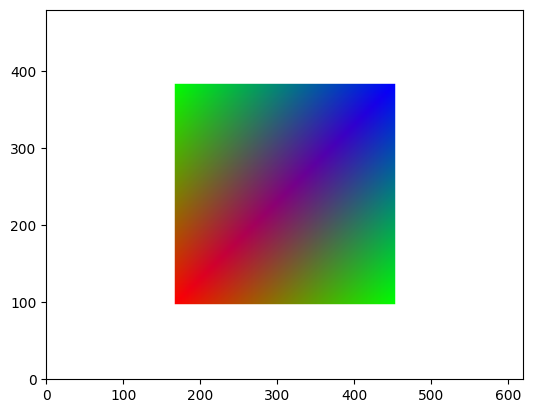

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import imageio

from OpenGLRender.render import *

height = 480
width = 620

render = OpenGLRender(height, width)
triangle_data = np.array([
        # Positions   Colors    normals
        .5, .5, 0.0,      0, 0, 1, 1,      0, 0, 1.0,
        .5, -.5, 0.0,      0, 1, 0, 1,      0, 0, 1.0,
        -.5, -.5, 0.0,      1, 0, 0, 1,      0, 0, 1.0,
        -.5, -.5, 0.0,      1, 0, 0, 1,      0, 0, 1.0,
        -.5, .5, 0.0,      0, 1, 0, 1,      0, 0, 1.0,
        .5, .5, 0.0,      0, 0, 1, 1,      0, 0, 1.0,
], dtype=np.float32)
render.setTriangleData(triangle_data)
render.setupBuffers()
img = render.draw()

plt.imshow(img)
plt.gca().invert_yaxis()
plt.show()


In [1]:
import matplotlib.pyplot as plt
from OpenGLRender.render import *
import numpy as np
from parse_obj import *
from parse_urdf import *


scene = loadObj('data/sawyer.obj')

robot = URDFModel('data/sawyer.urdf')

sawyer
link: 0
	name: base
link: 1
	cog: 0 0 0
	inertia: 1e-08 1e-08 1e-08     0     0     0
	mass: 0.0001
	name: torso
link: 2
	cog:    0    0 -0.5
	inertia:    5.06359    6.08689    4.96192 0.00105311   0.801996 0.00103417
	mass: 60.864
	name: pedestal
link: 3
	name: controller_box
link: 4
	name: pedestal_feet
link: 5
	cog:  -0.0006241 -2.8025e-05    0.065404
	inertia:   0.0067599   0.0067877   0.0074031  1.5888e-05 -6.1904e-07 -4.2024e-05
	mass: 2.0687
	name: right_arm_base_link
link: 6
	cog: 0.024366 0.010969  0.14363
	inertia:  0.053314  0.057902  0.023659 0.0080179  0.011734 0.0047093
	mass: 5.3213
	name: right_l0
link: 7
	cog:   0.0053207 -2.6549e-05      0.1021
	inertia:    0.011833   0.0082709   0.0049661  4.2124e-07  4.9425e-05 -4.4669e-06
	mass: 1.5795
	name: head
link: 8
	cog: 0 0 0
	inertia: 1e-08 1e-08 1e-08     0     0     0
	mass: 0.0001
	name: right_torso_itb
link: 9
	cog: -0.0030849  -0.026811   0.092521
	inertia:    0.022398    0.014613    0.017295  -0.0060875 -0.000

In [3]:
q = robot.getJoints()
robot.setJoints(q + 6*(np.random.random(q.shape)-.5) )

outAll = []
for name, mesh in scene.items():
    trans = robot.getBodyTransform(name)

    verts = mesh[1]
    verts = verts.reshape((3, -1))
    verts = (trans[0:3, 0:3] @ verts) + trans[0:3, 3:4]

    normals = mesh[2]
    normals = normals.reshape((3, -1))
    normals = trans[0:3, 0:3] @ normals

    colors = 0.95 * np.ones((4, verts.shape[1]), dtype=np.float32)

    out = np.vstack((verts, colors, normals))
    outAll.append(out)

triangle_data = np.hstack(outAll).T


height = 480 * 4
width = 620 * 4

render = OpenGLRender(height, width)
render.cam.model_matrix[0:3, 3] = [0, -.4, -1.5]


render.setTriangleData(triangle_data)
render.setupBuffers()

img = render.draw()
plt.imshow(img)
plt.gca().invert_yaxis()
plt.show()

Renderer: b'NVIDIA GeForce RTX 4090/PCIe/SSE2'
OpenGL version supported:  b'4.6.0 NVIDIA 525.85.12'


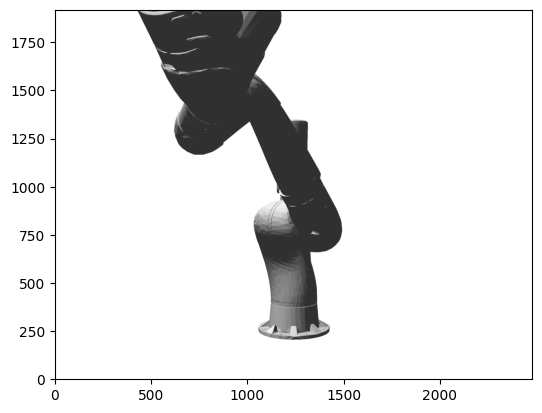